In [3]:
#for handling class imbalance
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [62]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
data.shape

(768, 9)

In [64]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
#distribution of outcome
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

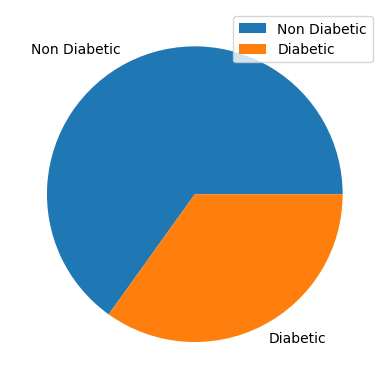

In [66]:
plt.pie(data['Outcome'].value_counts(),labels=['Non Diabetic','Diabetic'])
plt.legend()

In [67]:
#from above we see have imbalanced data distribution which may lead for our model to ignore the minority class

In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [69]:
#this are are columns in which the values being zero is unrealistic 
#we check for skewness to see the best way to replace the 0 in their columns

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
skewness_score =[]
for column in columns_to_replace:
    skewness = data.loc[data[column] > 0]
    skewness_score.append(skewness[column].skew())
    
print(skewness_score)

[0.5309885349396284, 0.13415273171959258, 0.6906190139841921, 2.1664638438124424, 0.5939697505712674]


In [70]:
#since the BloodPressure is not positively skewed we will use the mean to replace the 0 in column 

mean_skinthickness = data[data['BloodPressure'] != 0]['BloodPressure'].mean()

data['BloodPressure'] = data['BloodPressure'].replace(0, mean_skinthickness)

data.loc[data['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [71]:
#for the positively skewed data we fill using mean
postively_skewed_columns = ['Glucose', 'SkinThickness', 'Insulin', 'BMI']
for column in postively_skewed_columns:
    median= data[column].median()
    data[column] = data[column].replace(0, median)

In [72]:
X = data.iloc[:,:-1]
y= data['Outcome']

In [73]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.000000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.250000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00


<Axes: >

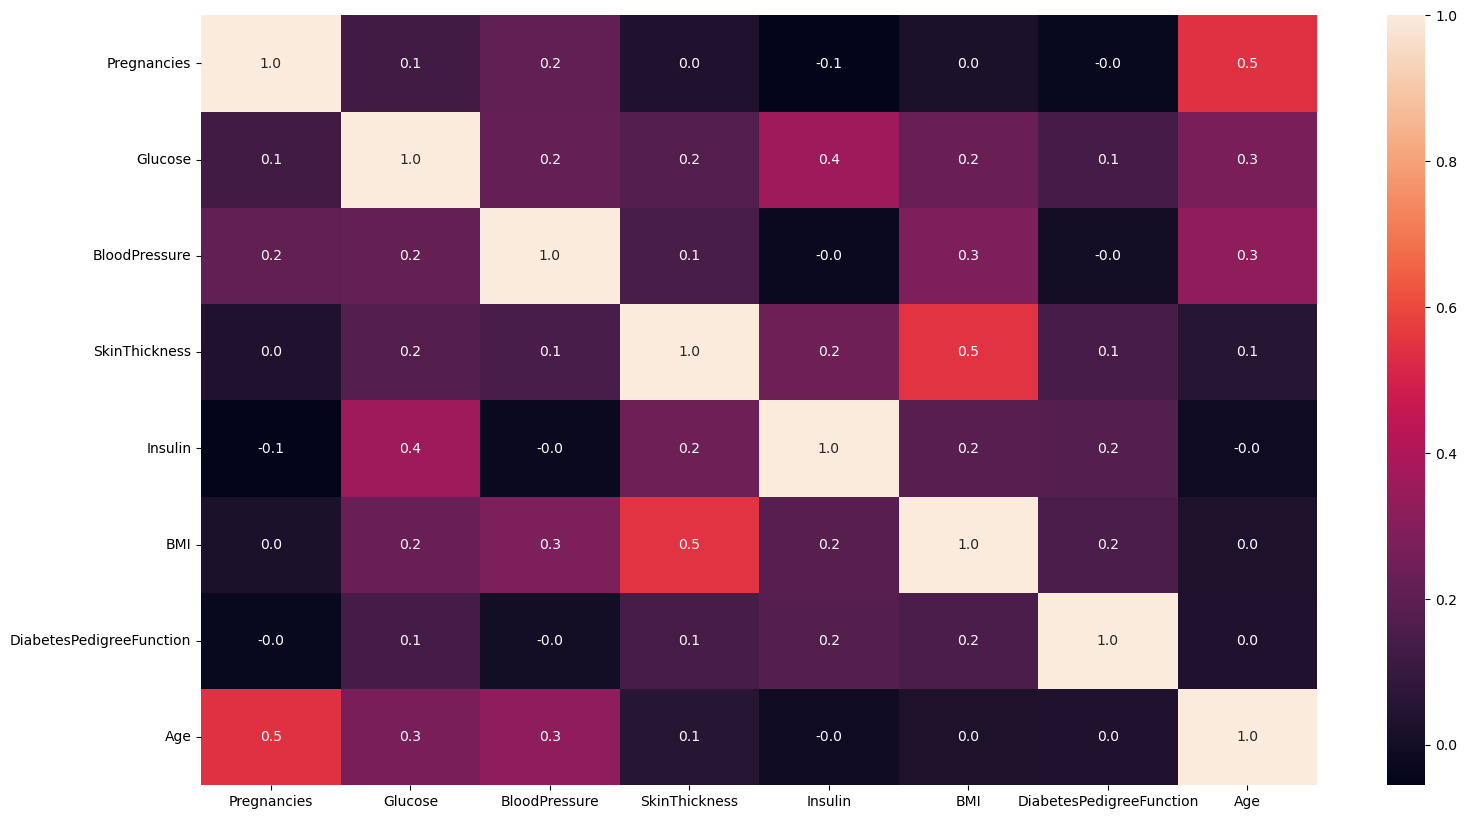

In [74]:
plt.figure(figsize=(18, 10))
sbn.heatmap(X.corr(),annot=True,fmt=".1f")

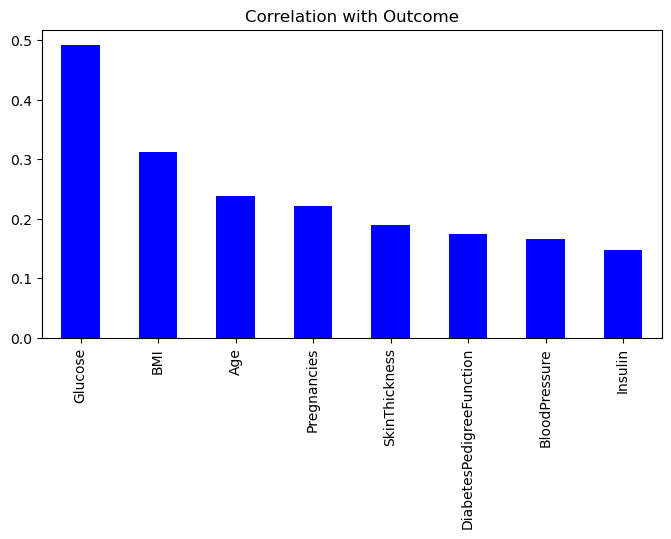

In [75]:
data_correlations=data.corr()['Outcome'].drop('Outcome')

data_correlations = data_correlations.sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.title("Correlation with Outcome")
ax = data_correlations.plot(kind='bar',color='blue')

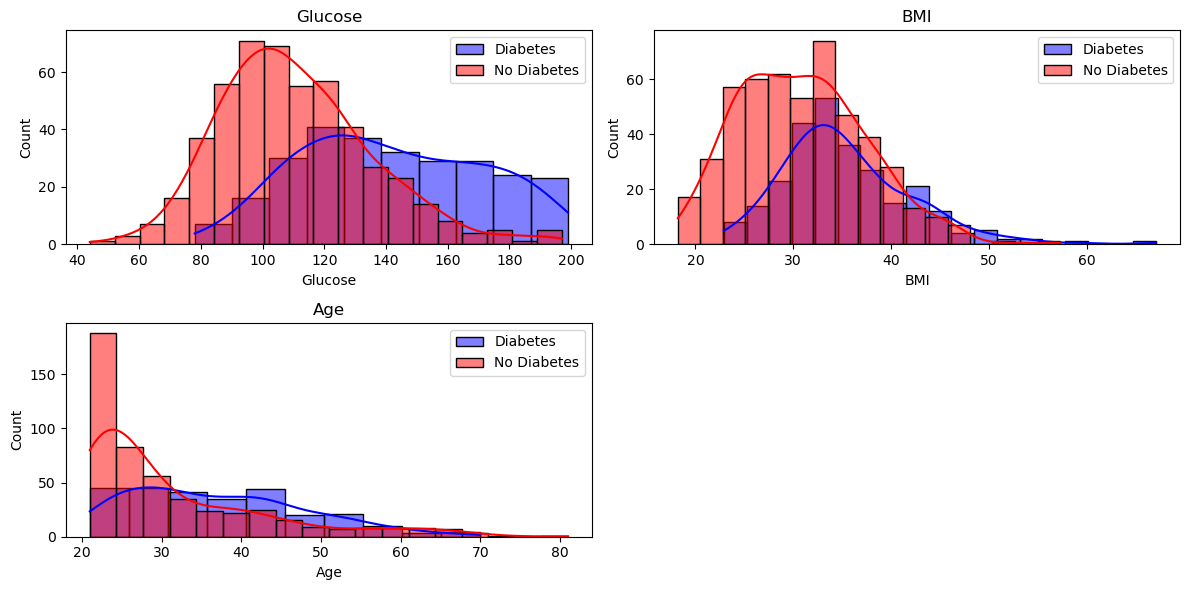

In [98]:
# checking characterics of people with diabetes and those with no diabetes
diabetic = data.loc[data['Outcome']==1]
non_diabetic = data.loc[data['Outcome']==0]

# this is from the correlation above
important_features = ['Glucose', 'BMI', 'Age']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sbn.histplot(diabetic[feature], label='Diabetes', color='blue', kde=True)
    sbn.histplot(non_diabetic[feature], label='No Diabetes', color='red', kde=True)
    plt.title(feature)
    plt.xlabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [77]:
scaler =MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# handling class imbalance
smote = SMOTE(random_state=20)

X_train_smote,y_train_smote=smote.fit_resample(X_train_scaled, y_train)

In [79]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [80]:
best_knn = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print(f"Best params {best_params} ")
print(f"best score {best_score}")

Best params {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'} 
best score 0.8385936407255528


In [81]:
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance')

knn.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [82]:
prediction = knn.predict(X_test_scaled)

knn.score(X_test_scaled,y_test)

accuracy_score(prediction,y_test)

0.7186147186147186

In [83]:
#hyper parameter tuning for Decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with DecisionTreeClassifier
gridCV = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')
gridCV.fit(X_train_smote, y_train_smote)

best_estimator = gridCV.best_estimator_
best_score = gridCV.best_score_
best_params= gridCV.best_params_

print(best_params)
print(f"best score {best_score}")

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
best score 0.7949916427455398


In [85]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=30,min_samples_leaf=1,min_samples_split=5,splitter='random')

model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=5,
                       splitter='random')

In [86]:
y_pred= model.predict(X_test_scaled)

print(accuracy_score(y_pred,y_test))

0.7142857142857143


In [87]:
# classification report for decision tree
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       151
           1       0.59      0.59      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



Text(0.5, 1.0, 'Confusion matrix for Decision Classifier')

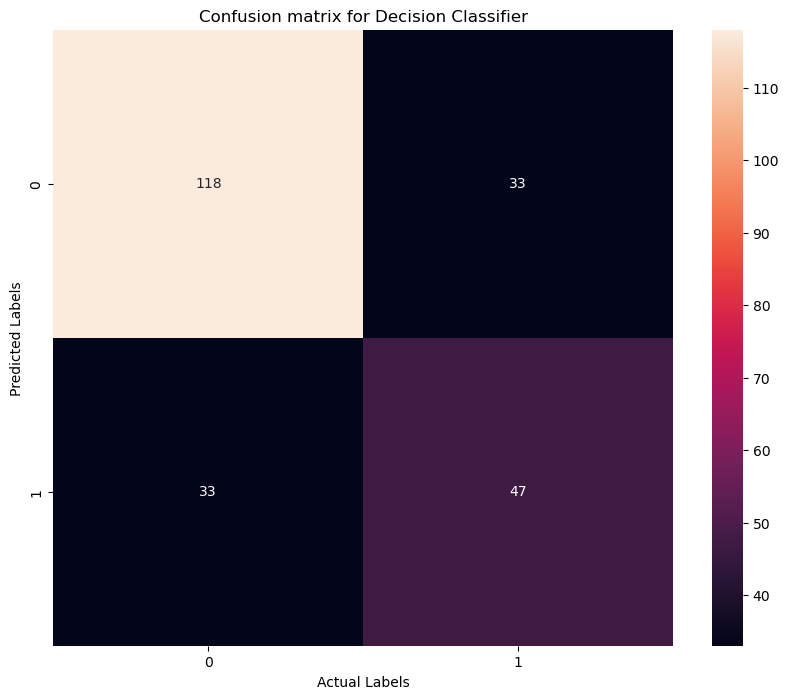

In [88]:
# confusion matrix report for decision tree
matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))

sbn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion matrix for Decision Classifier")

Text(0.5, 1.0, 'Confusion matrix for KNN')

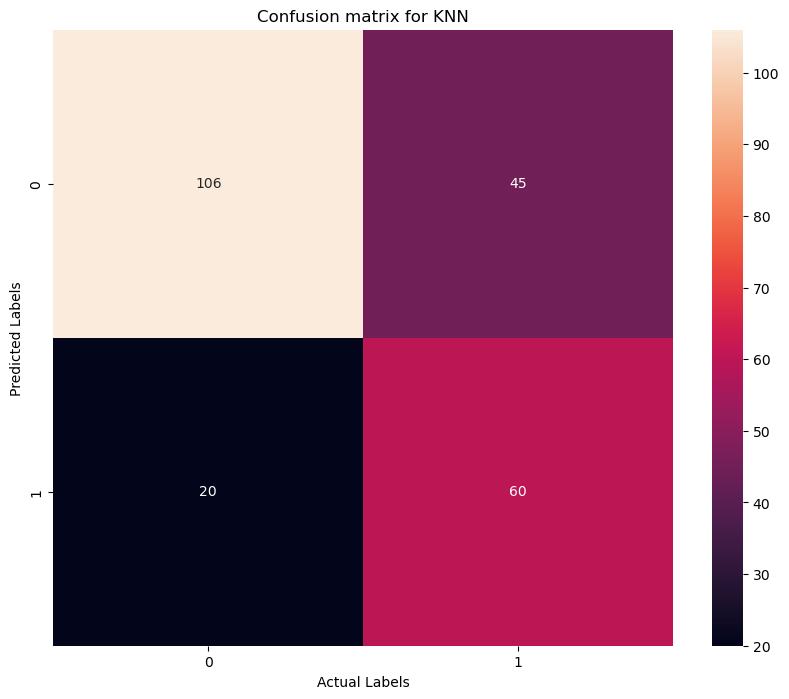

In [89]:
# classification matrix for knn
matrix = confusion_matrix(y_test,prediction)

plt.figure(figsize=(10,8))

sbn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion matrix for KNN")

In [90]:
# classification report for knn
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       126
           1       0.75      0.57      0.65       105

    accuracy                           0.72       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.72      0.72      0.71       231



In [91]:
# cross validation
cv_scores_knn = cross_val_score(best_knn, X_train_smote, y_train_smote, cv=5, scoring='f1')
print(f"kNN Cross-Validation Scores: {cv_scores_knn}")
print(f"kNN Mean Cross-Validation Score: {cv_scores_knn.mean()}")

kNN Cross-Validation Scores: [0.7972028  0.78378378 0.83116883 0.89473684 0.88607595]
kNN Mean Cross-Validation Score: 0.8385936407255528


In [92]:
cv_scores_tree = cross_val_score(best_estimator, X_train_smote, y_train_smote, cv=5, scoring='f1')
print(f"kNN Cross-Validation Scores: {cv_scores_tree}")
print(f"kNN Mean Cross-Validation Score: {cv_scores_tree.mean()}")

kNN Cross-Validation Scores: [0.72131148 0.65625    0.73972603 0.74626866 0.79432624]
kNN Mean Cross-Validation Score: 0.7315764801316531
